In [197]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [215]:
readFile = pd.read_csv('cleanDataLabel.csv')
svmData = readFile.drop(readFile.columns[0:3],axis=1)  #Dropping columns of index(0),Date, NDAQ(it is not used in predicting itself)
svmData = svmData.values
print(svmData.shape)

(1257, 14)


In [199]:
headerLen = svmData.shape[1]
x = svmData[:,:headerLen-1]  #Data value
x = np.where(x=='.',np.nan,x)  #There was some '.' in data so replaced with nan
x = x.astype(np.float)
x_float = np.array(list(x),dtype=np.float)
y = svmData[:,headerLen-1]  #Target Values
y = y.astype(np.int)


In [214]:
#Data impulation for nan values(SVM doesn't support it so)
imp = Imputer(missing_values='NaN',strategy='mean',axis=0).fit(x)
x_nan = imp.transform(x)

#Normalize the data
x_norm = (x_nan-x_nan.mean())/(x_nan.max()-x_nan.min())
print(x_norm.shape)

(1257, 13)


c:\users\patel\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [201]:
#Separating training and testing data Randomly
xtrain,xtest,ytrain,ytest = train_test_split(x_norm,y,test_size=0.3)

#Applying SVM on all features
c=1
svc = svm.SVC(kernel='rbf',C=c).fit(xtrain,ytrain)
y_svm = svc.predict(xtest)
acc = np.sum(y_svm==ytest)/ytest.shape[0]


c:\users\patel\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [202]:
print('***SVM on all Features***')
print('All data length :', x_nan.shape[0])
print('Training Data Length :',xtrain.shape[0])
print('Testing Data Lenght :',xtest.shape[0])
print('Accuracy is ',acc)


***SVM on all Features***
All data length : 1257
Training Data Length : 879
Testing Data Lenght : 378
Accuracy is  0.5132275132275133


Text(0.5, 1.0, 'Correlation with respect to NDAQ')

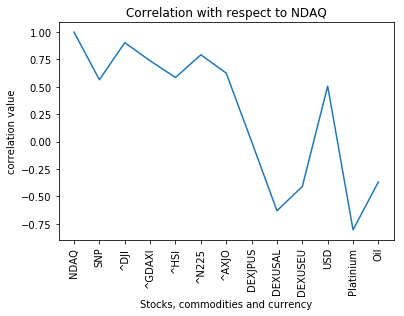

In [238]:
# Finding Correlation of NDAQ with all features
corrData = readFile.drop(readFile.columns[0:2],axis=1) #Dropping columns of index(0) and Date
corrData = corrData.drop(corrData.columns[-1],axis=1)  # Dropping Traget Value 
ndaqCorr = corrData.corr()['NDAQ']
ndaqCorr
plt.plot(ndaqCorr)
plt.xticks(rotation='vertical')
plt.xlabel('Stocks, commodities and currency')
plt.ylabel('correlation value')
plt.title('Correlation with respect to NDAQ')

In [236]:
ndaqCorr.iloc[]

0.9038467382845914

In [205]:
ndaqCorr = ndaqCorr.sort_values(ascending=False)
ndaqDF = pd.DataFrame(ndaqCorr)
print('***Highly Correlated Features***')
print(ndaqDF.iloc[:6])
indexList = []
for i in range(1,6):
    val = ndaqDF.iloc[i]
    #indexList.append(ndaqDF.index[ndaqDF['NDAQ']==val].tolist())
    indexList.append(val.name)
print()
print('Top Features :',indexList)

***Highly Correlated Features***
            NDAQ
NDAQ    1.000000
^DJI    0.903847
^N225   0.792810
^GDAXI  0.737457
^AXJO   0.625004
^HSI    0.585693

Top Features : ['^DJI', '^N225', '^GDAXI', '^AXJO', '^HSI']


In [206]:
topFetData = readFile.drop(readFile.columns[0:3],axis=1)


In [207]:
xtop = topFetData[indexList]
imp = Imputer(missing_values='NaN',strategy='mean',axis=0).fit(xtop)
x_dash = imp.transform(xtop)
y = topFetData.iloc[:,-1]

#Normalizing the Data
x_norm1 = (x_dash - x_dash.mean())/x_dash.max()-x_dash.min()

c:\users\patel\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [228]:
#Separating training and testing data Randomly
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x_norm1,y,test_size=0.3)

#Applying SVM on all features
c=1
svc = svm.SVC(kernel='rbf',C=c).fit(xtrain1,ytrain1)
y_svm = svc.predict(xtest1)
acc = np.sum(y_svm==ytest1)/ytest1.shape[0]


c:\users\patel\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [229]:
print('***SVM on top highly correlated Features***')
print('All data length :', x_nan.shape[0])
print('Training Data Length :',xtrain.shape[0])
print('Testing Data Lenght :',xtest.shape[0])
print('Accuracy is ',acc)


***SVM on top highly correlated Features***
All data length : 1257
Training Data Length : 879
Testing Data Lenght : 378
Accuracy is  0.582010582010582


In [230]:
#Applying PCA Helps in Visulization and dimensional Reduction Let's see
pca = PCA(n_components=3)
pc = pca.fit_transform(x_norm1)


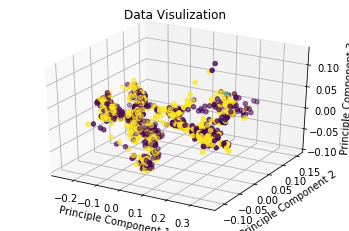

In [231]:
#plotting Data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_zlabel('Principle Component 3')
ax.set_title('Data Visulization')
ax.scatter(pc[:,0],pc[:,1],pc[:,2],c=y)

In [232]:
#Let's apply SVM on this data and check accuracy
#Separating training and testing data Randomly
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(pc,y,test_size=0.3)

#Applying SVM on all features
c=1
svc = svm.SVC(kernel='rbf',C=c).fit(xtrain2,ytrain2)
y_svm = svc.predict(xtest2)
acc = np.sum(y_svm==ytest2)/ytest2.shape[0]


c:\users\patel\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [233]:
print('***SVM on 3 Principle Components***')
print('All data length :', pc.shape[0])
print('Training Data Length :',xtrain2.shape[0])
print('Testing Data Lenght :',xtest2.shape[0])
print('Accuracy is ',acc)


***SVM on 3 Principle Components***
All data length : 1257
Training Data Length : 879
Testing Data Lenght : 378
Accuracy is  0.5052910052910053
